Nathan Colwell's Section

Random Forest Comparison

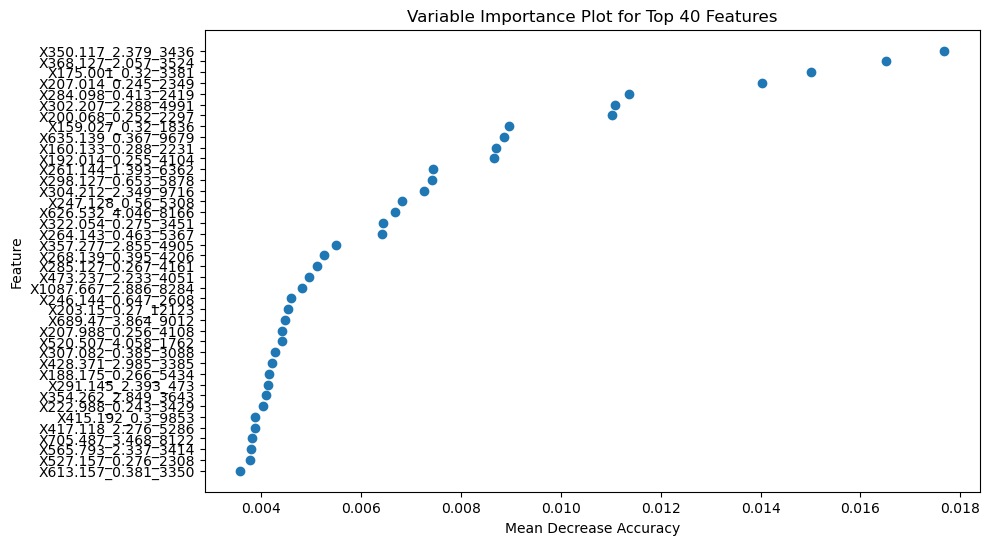

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Read the CSV file
features = pd.read_csv("eso_3xBlkRem_0deleted_batcheffect_waveICA_deleted_alpha1_cutoff0.1_k10.csv")

# Filter the data for the specified conditions
inf_abx_control = features[(features['ATTRIBUTE_condition_treatment'] == "inf_abx") | (features['ATTRIBUTE_condition_treatment'] == "inf_control")]

# Create the target variable and feature matrix
X = inf_abx_control.iloc[:, 11:3450]  # Assuming the relevant columns are from 12 to 3449
y = inf_abx_control['ATTRIBUTE_condition_treatment']

# Create and train the Random Forest classifier
inf_abx_control_rffit1000 = RandomForestClassifier(n_estimators=1000, random_state=0)
inf_abx_control_rffit1000.fit(X, y)

# Get feature importances (mean decrease accuracy)
feature_importances = inf_abx_control_rffit1000.feature_importances_

# Sort the features by importance and select the top 40
top_features = X.columns[feature_importances.argsort()[::-1][:40]]

# Create a variable importance plot as a scatter plot for the top 40 features
plt.figure(figsize=(10, 6))
plt.scatter(feature_importances[feature_importances.argsort()[::-1][:40]], top_features)
plt.xlabel("Mean Decrease Accuracy")
plt.ylabel("Feature")
plt.title("Variable Importance Plot for Top 40 Features")
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Create a DataFrame from the top 40 features and their mean decrease accuracy values
variable_importance_df = pd.DataFrame({'Feature': top_features, 'Mean Decrease Accuracy': feature_importances[feature_importances.argsort()[::-1][:40]]})

# Save the DataFrame to a CSV file
variable_importance_df.to_csv('variable_importance.csv', index=False)


Walter Galie's Section

Graphing

In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#merge the variable importance file with the metadata file
RF = pandas.read_csv('variable_importance.csv')
RF_mass_list = RF['Feature'].to_list()
print(RF_mass_list)

merged_data = pandas.read_csv('eso_3xBlkRem_0deleted_batcheffect_waveICA_deleted_alpha1_cutoff0.1_k10.csv')
print(merged_data.head())


['X350.117_2.379_3436', 'X368.127_2.057_3524', 'X175.001_0.32_3381', 'X207.014_0.245_2349', 'X284.098_0.413_2419', 'X302.207_2.288_4991', 'X200.068_0.252_2297', 'X159.027_0.32_1836', 'X635.139_0.367_9679', 'X160.133_0.288_2231', 'X192.014_0.255_4104', 'X261.144_1.393_6362', 'X298.127_0.653_5878', 'X304.212_2.349_9716', 'X247.128_0.56_5308', 'X626.532_4.046_8166', 'X322.054_0.275_3451', 'X264.143_0.463_5367', 'X357.277_2.855_4905', 'X268.139_0.395_4206', 'X285.127_0.267_4161', 'X473.237_2.233_4051', 'X1087.667_2.886_8284', 'X246.144_0.647_2608', 'X203.15_0.27_12123', 'X689.47_3.864_9012', 'X207.988_0.256_4108', 'X520.507_4.058_1762', 'X307.082_0.385_3088', 'X428.371_2.985_3385', 'X188.175_0.266_5434', 'X291.145_2.393_473', 'X354.262_2.849_3643', 'X222.988_0.243_3429', 'X415.192_0.3_9853', 'X417.118_2.276_5286', 'X705.487_3.468_8122', 'X565.793_2.337_3414', 'X527.157_0.276_2308', 'X613.157_0.381_3350']
                              SampleID  Sample_Number ATTRIBUTE_condition  \
0        

C:\Users\natha\AppData\Local\Temp\ipykernel_10596\3984038392.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots()


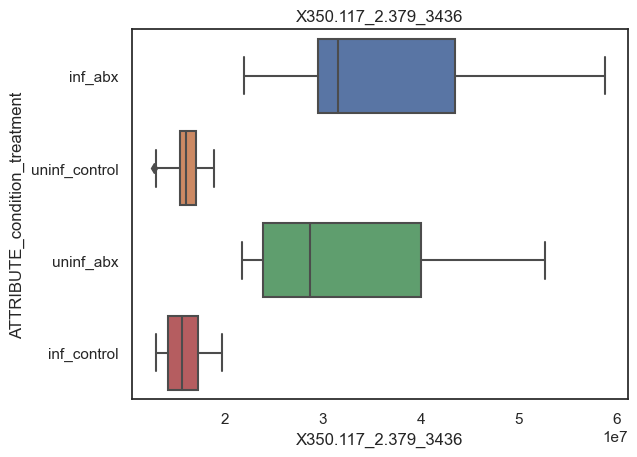

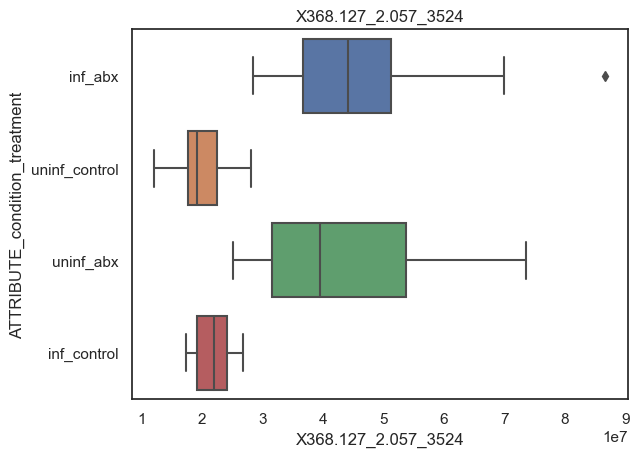

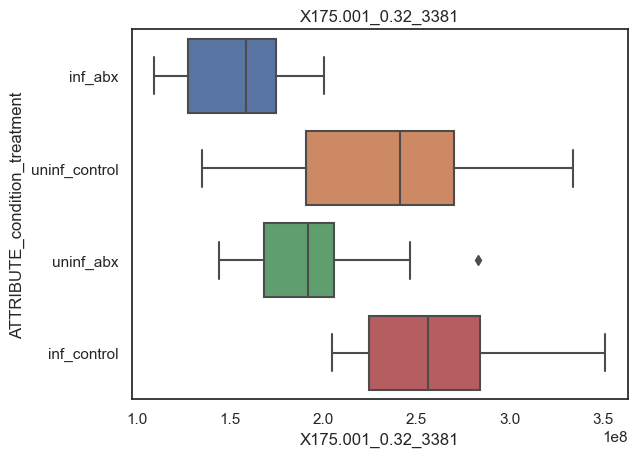

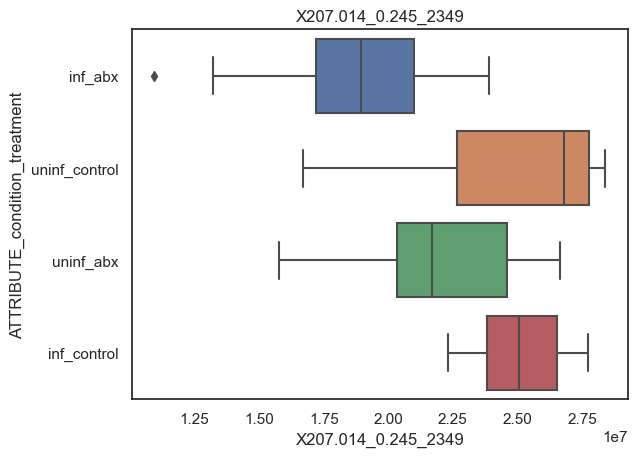

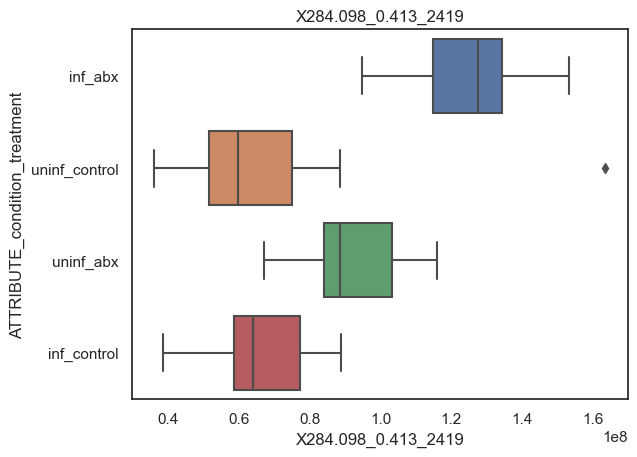

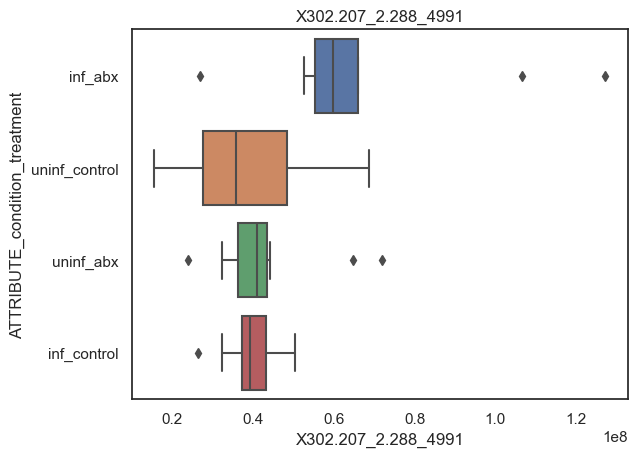

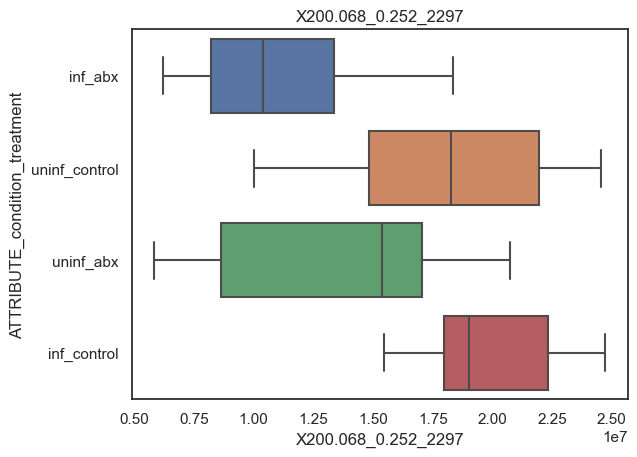

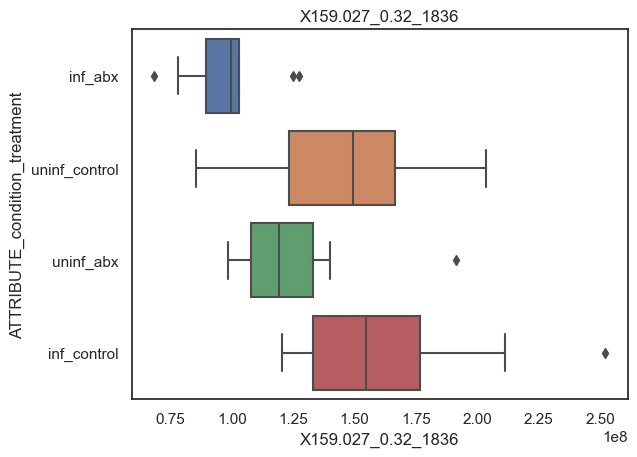

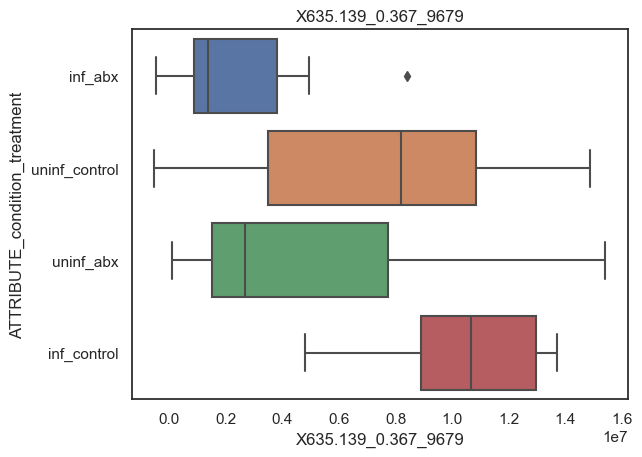

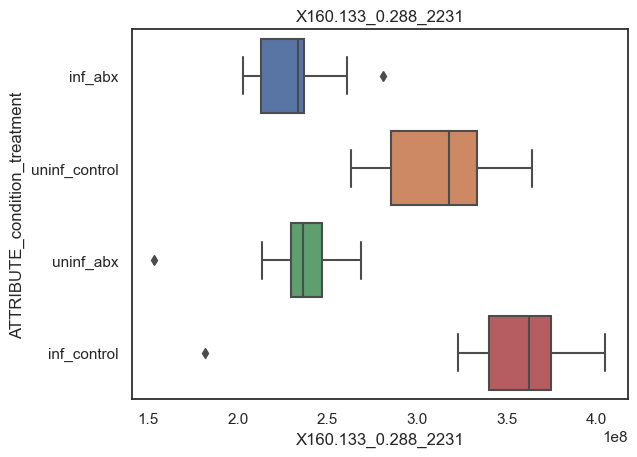

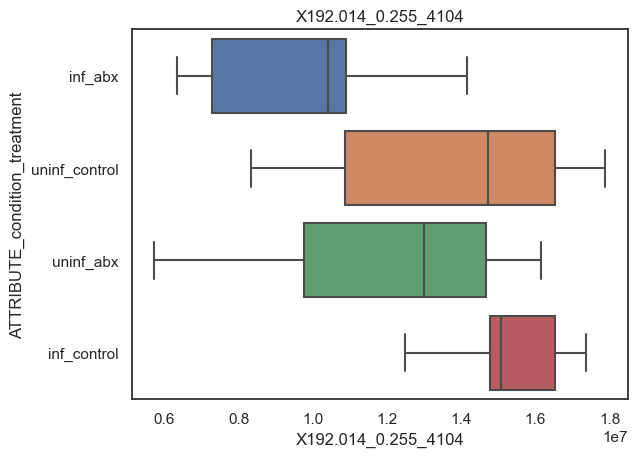

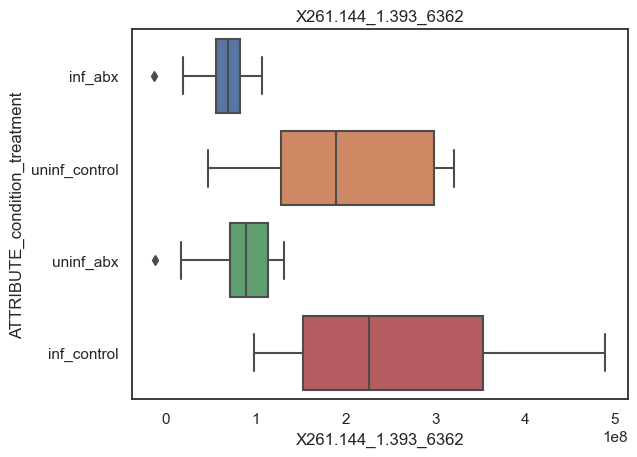

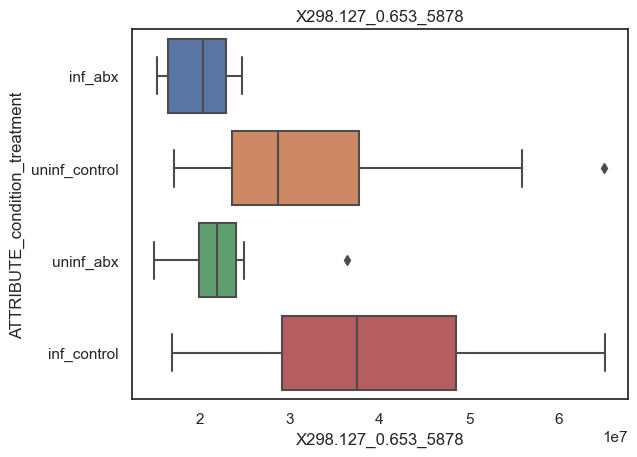

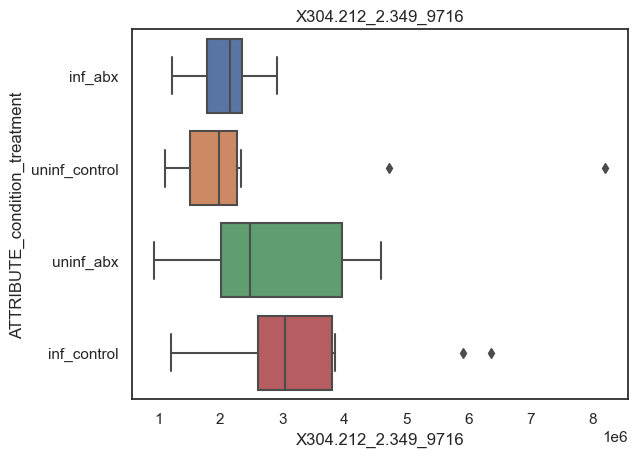

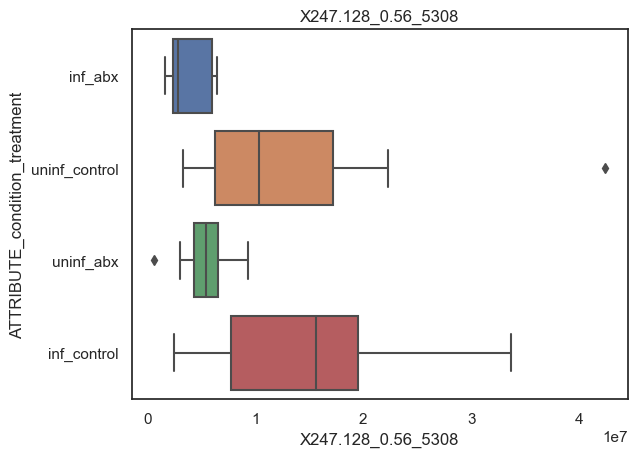

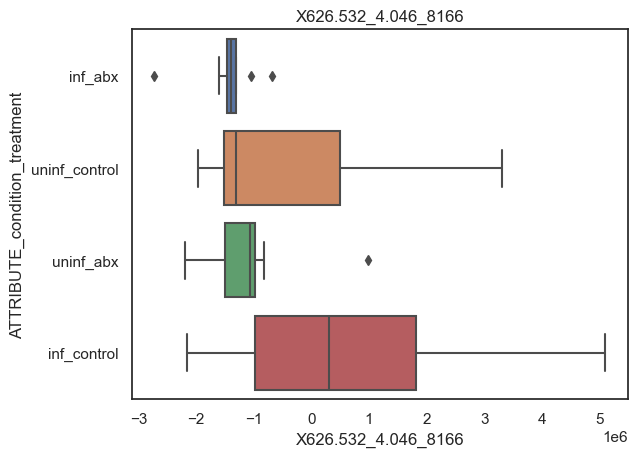

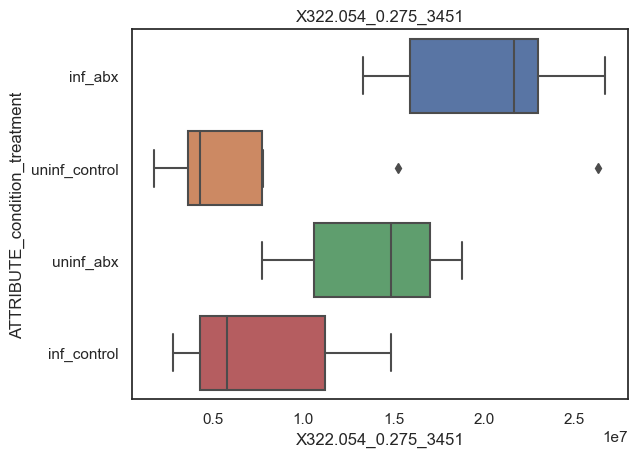

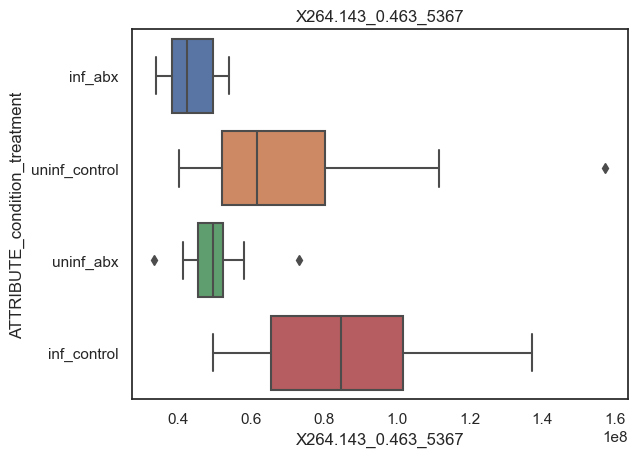

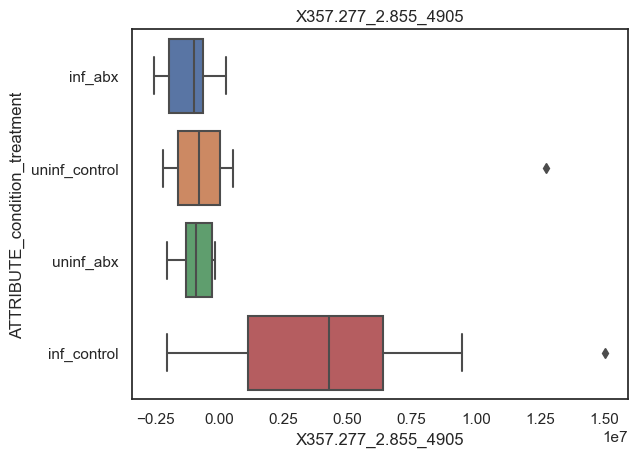

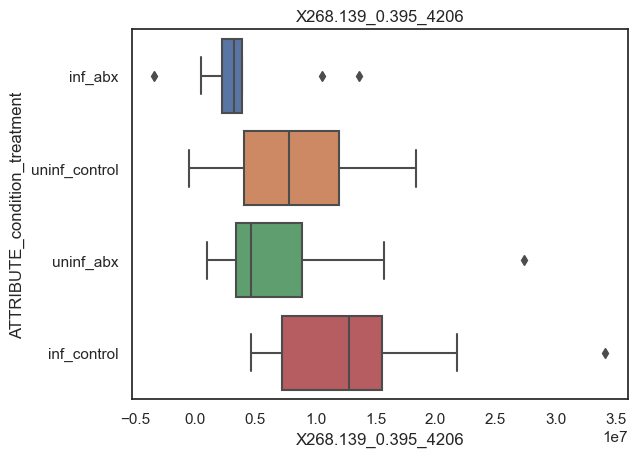

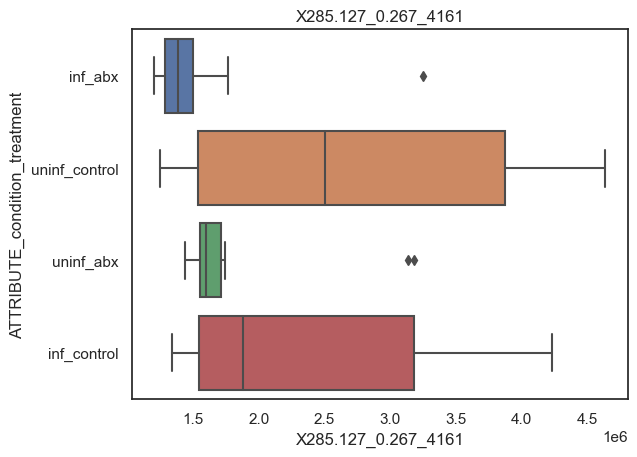

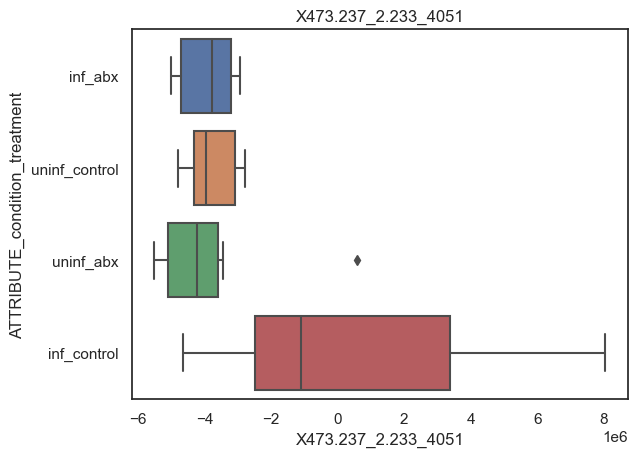

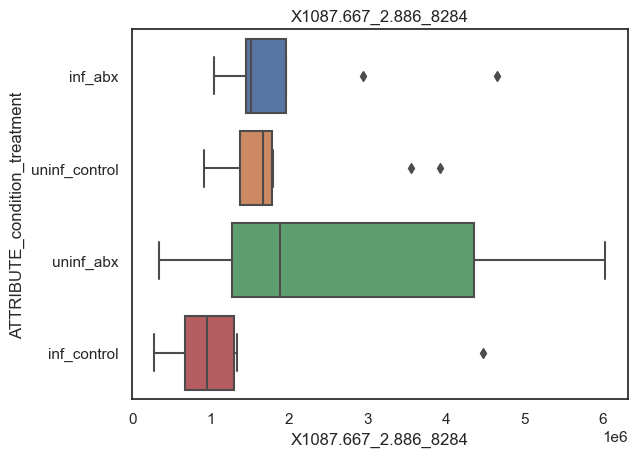

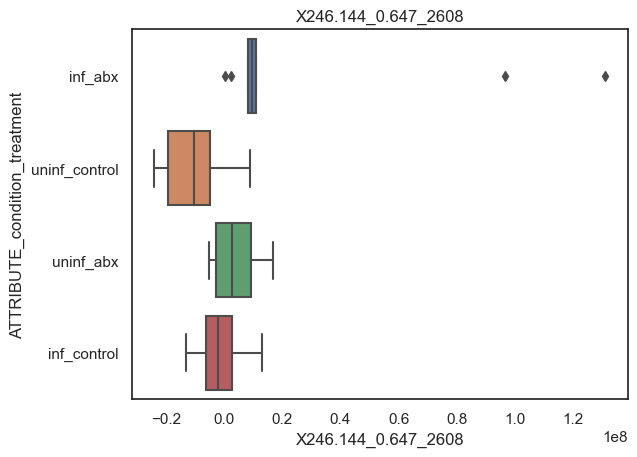

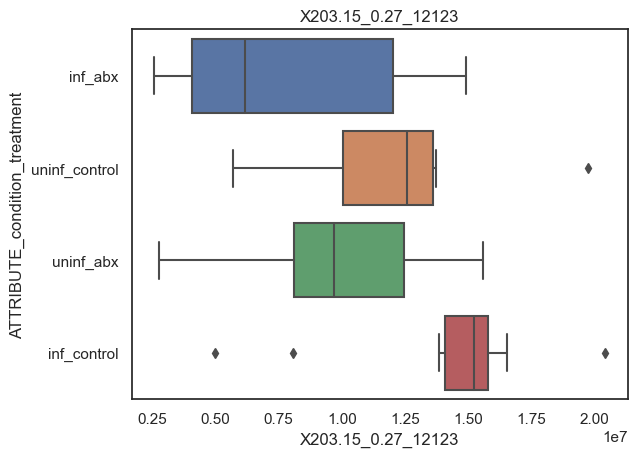

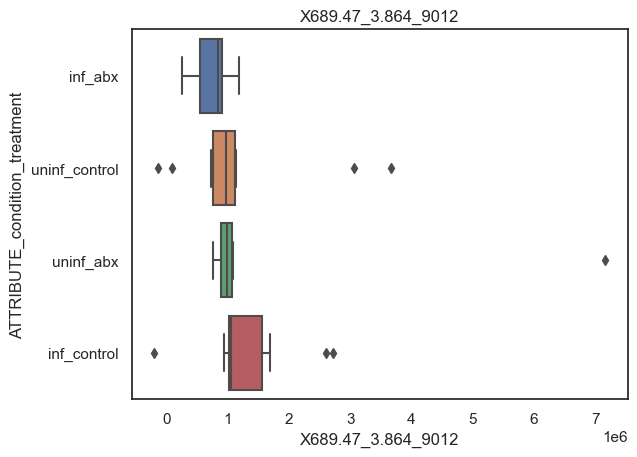

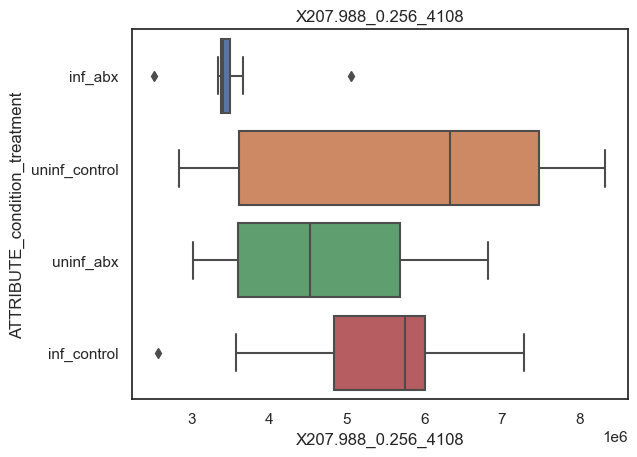

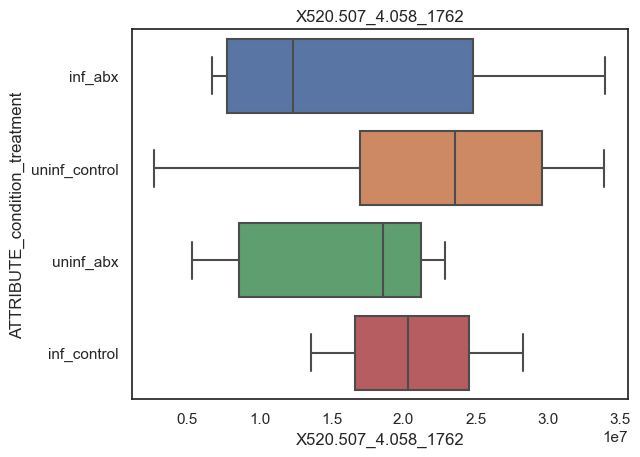

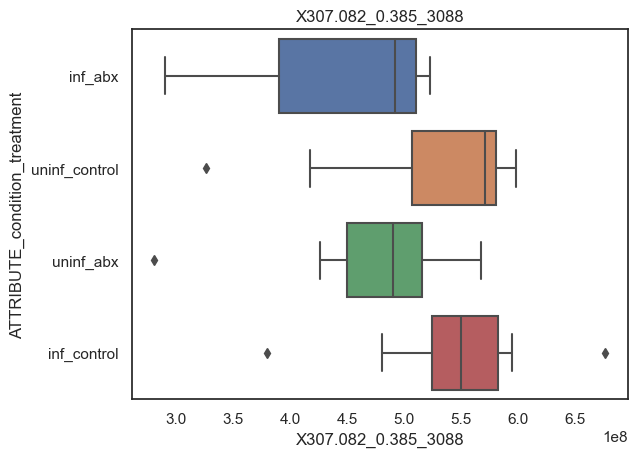

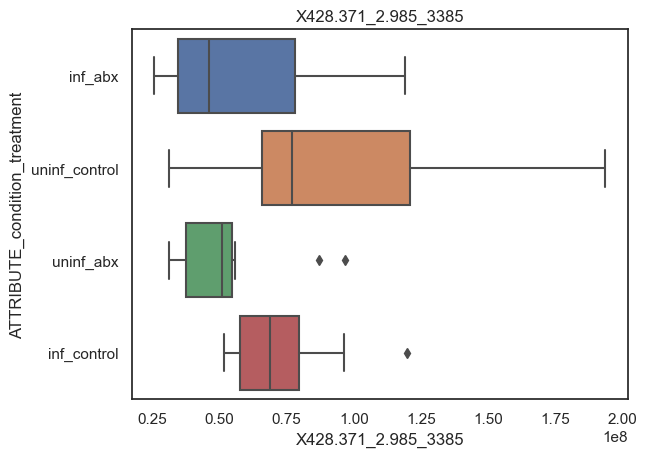

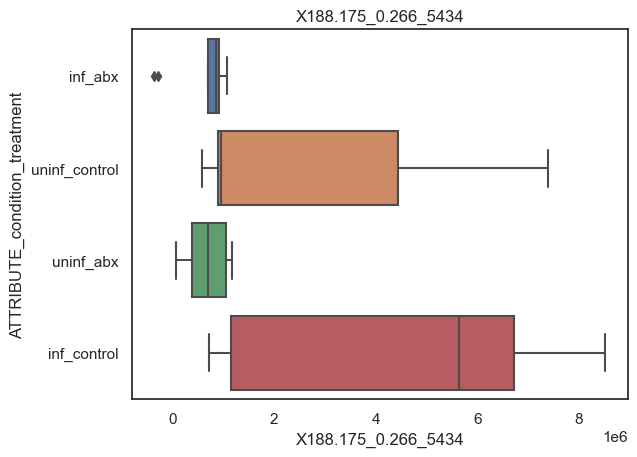

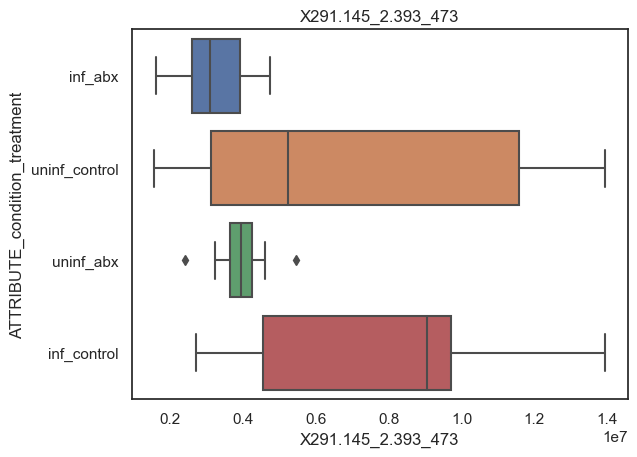

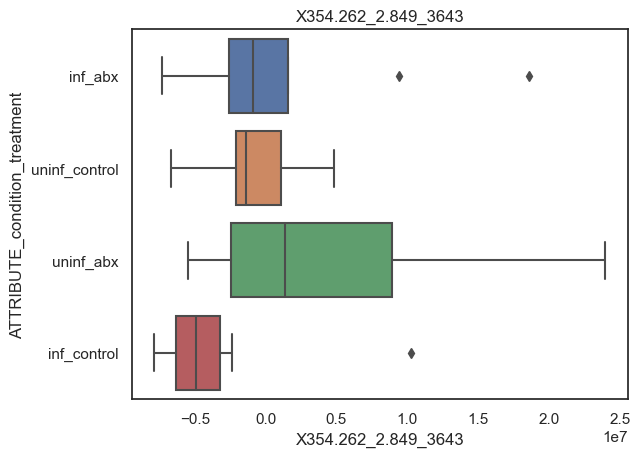

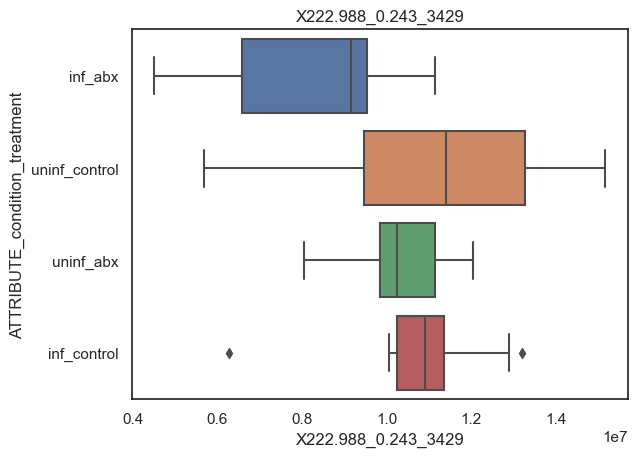

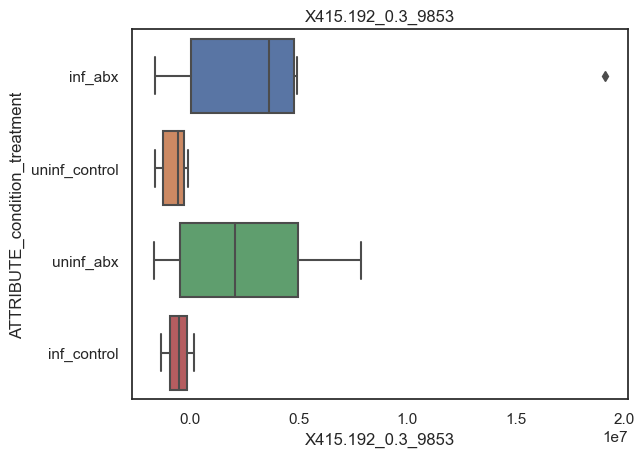

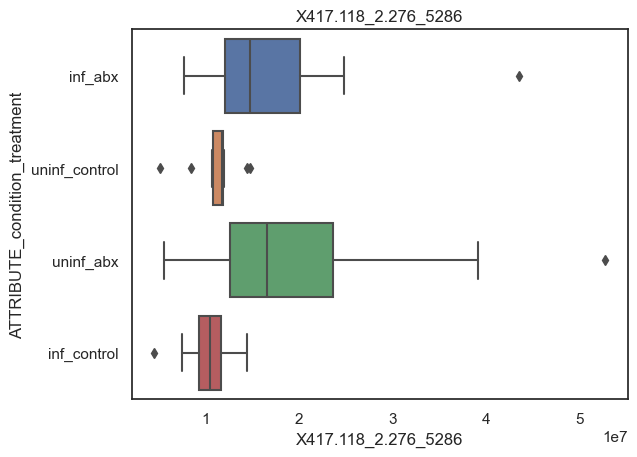

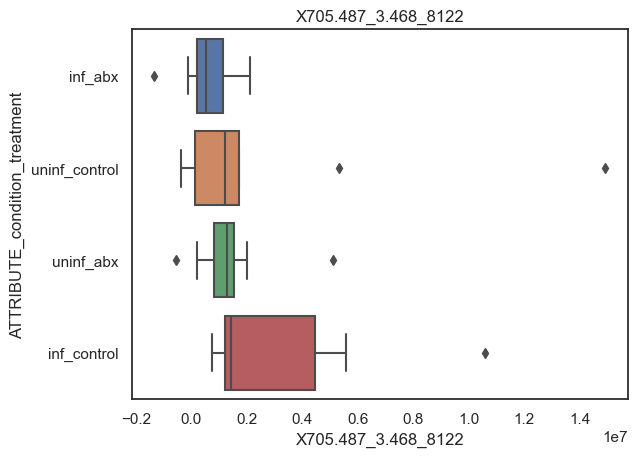

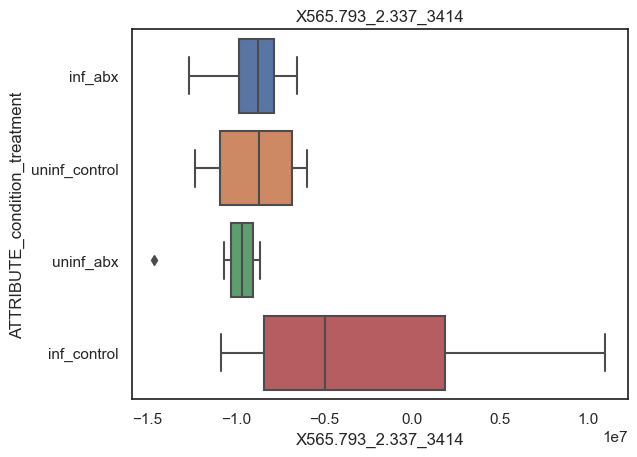

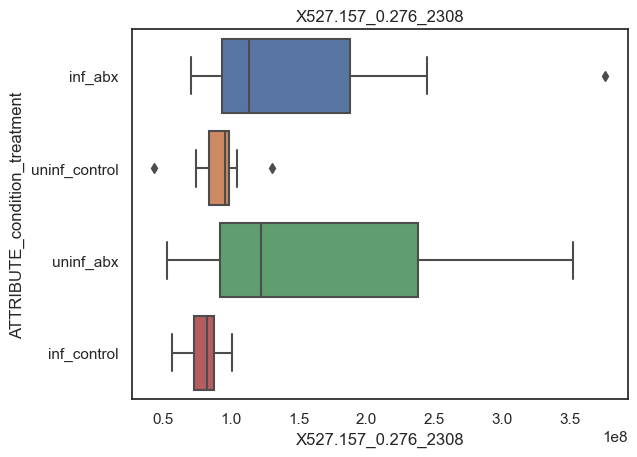

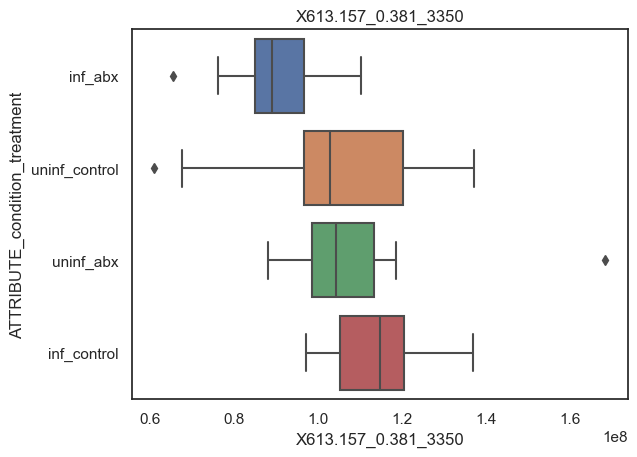

In [5]:
sns.set_theme(style="white")


RF_mass_list_number = 1
#boxplots

for RF_mass in RF_mass_list:
    fig1, ax1 = plt.subplots()
    ax1.set_title(RF_mass)
    sns.boxplot(x=merged_data[str(RF_mass)] , y=merged_data['ATTRIBUTE_condition_treatment'])
    #plt.savefig(str(RF_mass) + "_inf_vs_uninf_control.jpg")
    #need to add _ before inf because numbers exist before it
    RF_mass_list_number += 1

Kole Long's Section

Calculating fold changes and median differences

In [11]:
import os
import numpy as np
import pandas as pd

sns.set_theme(style="white")

# Create a directory to save the plots
if not os.path.exists('boxplots'):
    os.makedirs('boxplots')

# Create an empty dictionary to store median differences
median_diff_dict = {}

# Iterate through the features in RF_mass_list
for RF_mass in RF_mass_list:
    # Check if the feature is numeric
    if np.issubdtype(merged_data[RF_mass].dtype, np.number):
        # Create a new figure and axes
        fig, ax = plt.subplots()
        ax.set_title(RF_mass)
        
        # Create a boxplot
        sns.boxplot(x=merged_data[RF_mass], y=merged_data['ATTRIBUTE_condition_treatment'], ax=ax)
        
        # Calculate median differences
        inf_values = merged_data[RF_mass][merged_data['ATTRIBUTE_condition_treatment'] == 'inf_abx']
        uninf_values = merged_data[RF_mass][merged_data['ATTRIBUTE_condition_treatment'] == 'inf_control']
        median_diff = np.median(inf_values) - np.median(uninf_values)
        median_diff_dict[RF_mass] = median_diff
        
        # Save the plot as a JPEG file in the 'boxplots' directory
        plt.savefig(os.path.join('boxplots', f"{RF_mass}_inf_vs_uninf_control.jpg"))
        
        # Close the figure to avoid memory issues
        plt.close(fig)
    else:
        print(f"Skipping non-numeric feature: {RF_mass}")

# Create a DataFrame from the dictionary
median_diff_df = pd.DataFrame(list(median_diff_dict.items()), columns=['Feature', 'Median Difference'])

# Add a third column for ranking the absolute values of median differences
median_diff_df['Rank'] = median_diff_df['Median Difference'].abs().rank(ascending=False)

# Print the calculated median differences with ranks
print("Median Differences with Ranks (based on absolute values):")
print(median_diff_df)

# Save the DataFrame to a CSV file if needed
median_diff_df.to_csv('median_differences_with_absolute_ranks.csv', index=False)



Median Differences with Ranks (based on absolute values):
                 Feature  Median Difference  Rank
0    X350.117_2.379_3436       1.591527e+07  15.0
1    X368.127_2.057_3524       2.214073e+07  11.0
2     X175.001_0.32_3381      -9.768436e+07   3.0
3    X207.014_0.245_2349      -6.095878e+06  23.0
4    X284.098_0.413_2419       6.346359e+07   4.0
5    X302.207_2.288_4991       2.050391e+07  12.0
6    X200.068_0.252_2297      -8.648372e+06  21.0
7     X159.027_0.32_1836      -5.472181e+07   6.0
8    X635.139_0.367_9679      -9.314124e+06  19.0
9    X160.133_0.288_2231      -1.285615e+08   2.0
10   X192.014_0.255_4104      -4.646842e+06  27.0
11   X261.144_1.393_6362      -1.562323e+08   1.0
12   X298.127_0.653_5878      -1.711133e+07  13.0
13   X304.212_2.349_9716      -8.820254e+05  37.0
14    X247.128_0.56_5308      -1.276967e+07  16.0
15   X626.532_4.046_8166      -1.707820e+06  35.0
16   X322.054_0.275_3451       1.592546e+07  14.0
17   X264.143_0.463_5367      -4.207039e+0